# Self Organizing Map 
## Coding

In [134]:
# necessary libraries
import sys
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

## データ準備

In [135]:
df = pd.read_csv('test_data.csv', index_col=0)
print(df.head())

# get values
input2d = df.values


          0         1         2
0  0.812327  0.385401  0.359206
1  0.868781  0.259367  0.273578
2  0.814705  0.393944  0.246055
3  0.622144  0.468073  0.287725
4  0.790177  0.315158  0.372890


## 可視化

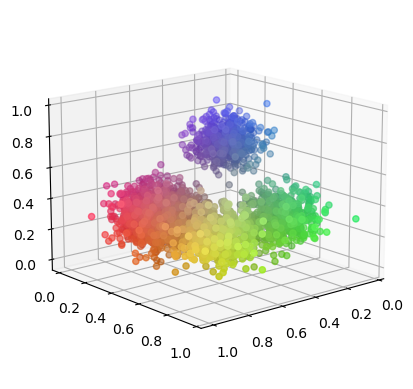

In [143]:
# plot data in 3-D space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs, ys, zs = input2d[:,0], input2d[:,1], input2d[:,2]
ax.scatter(xs, ys, zs, marker='o', c = input2d)
ax.view_init(15, 50, 0) 
plt.show()

## Setting-up

In [144]:
n_sample =  input2d.shape[0]  # number of samples / input vectors
n_dim    =  input2d.shape[1]      # number of dimensions of an input vector (here 3 dims are used) 

print('Input data have ', n_sample, ' samples (vectors)')
print('One sample has ', n_dim, ' dimensions')


Input data have  3500  samples (vectors)
One sample has  3  dimensions


### SOM 出力グリード設定

In [150]:
# setup SOM domain
n_rows = 100 
n_cols = 100   # SOM domains  

print('SOM ouput domain (neural networks) is rectangular grid')

SOM ouput domain (neural networks) is rectangular grid


### 学習率 (learning rate) と近傍関数 (neigborhood function)


In [151]:
iterate = 5000

lambda_lr, max_lr, lambda_nb = 0.25, 0.1, 0.5
life = iterate * lambda_lr
initial = n_rows*lambda_nb

# -----
index_map = np.zeros( [n_rows, n_cols, 2 ] )
for j in range(n_rows):
    for i in range(n_cols):
        index_map[j,i] = j,i
#------      

print('Training Loop : ', iterate, ' times')


Training Loop :  5000  times


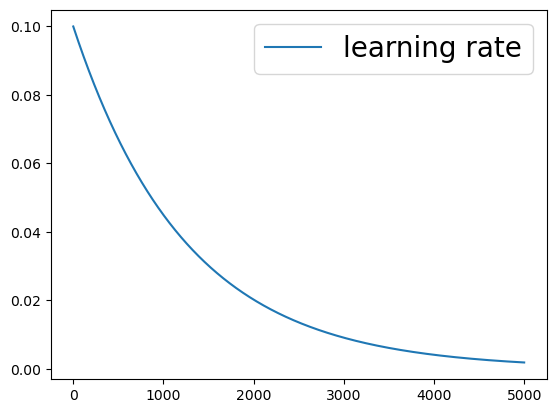

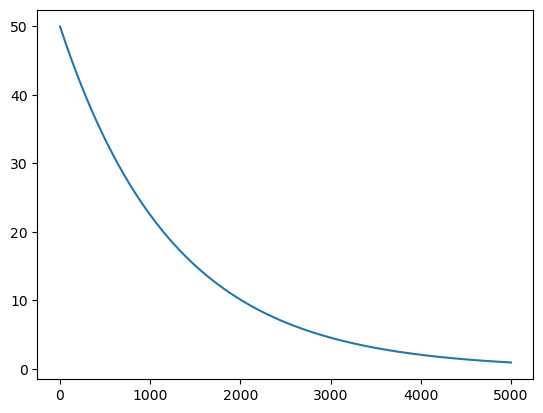

In [152]:
Lr  = max_lr * np.exp(-np.arange(iterate)/life)  # leaning rate (each step)
Nbh = initial * np.exp(-np.arange(iterate)/life) # Neiborhood function (each step)
plt.plot(Lr, label='learning rate')
plt.legend(fontsize=20)
plt.show()
plt.plot(Nbh)

### 初期化

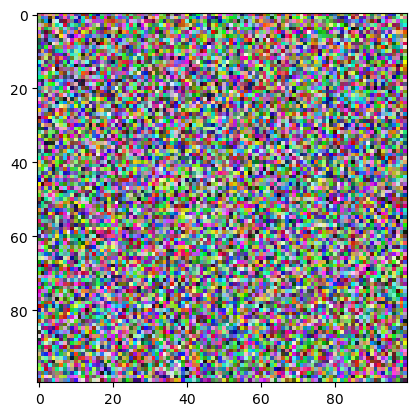

In [153]:
# initialize the SOM domain, neural networks, topology
grid = np.random.uniform(low=0, high=1, size=[n_rows, n_cols, n_dim] )
# plot the initial condition
plt.imshow(grid) 

### SOM loop

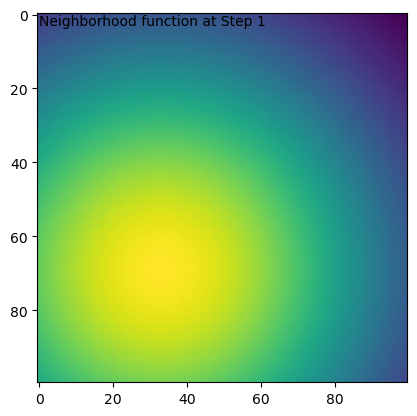

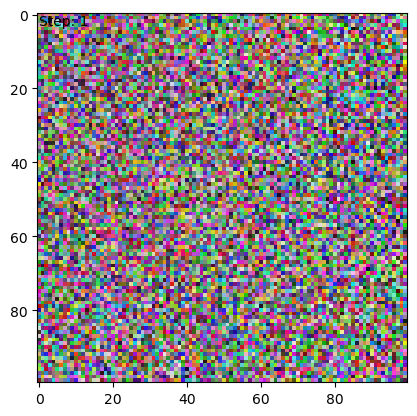

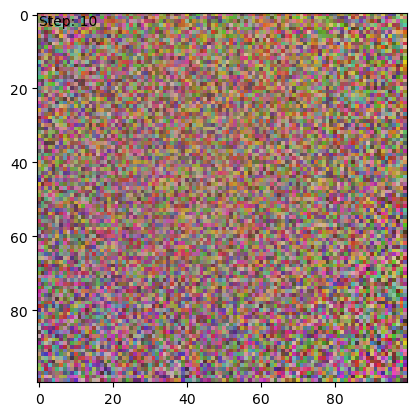

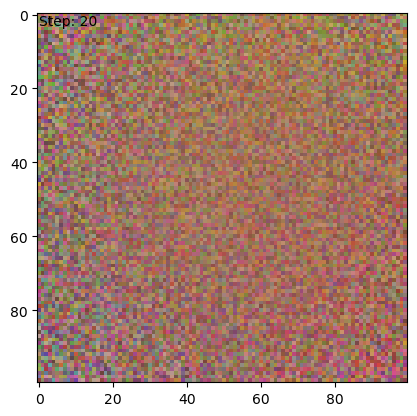

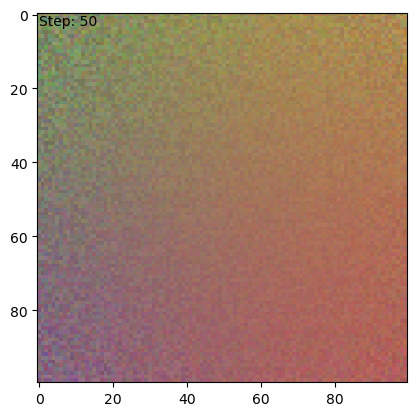

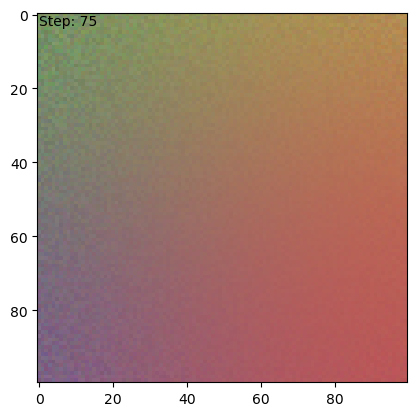

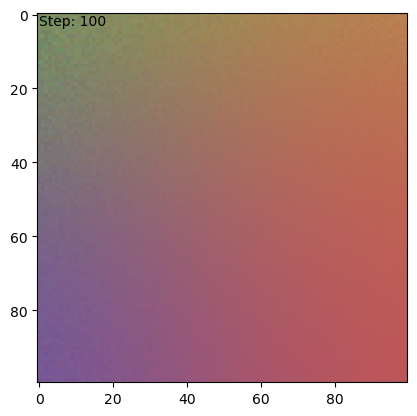

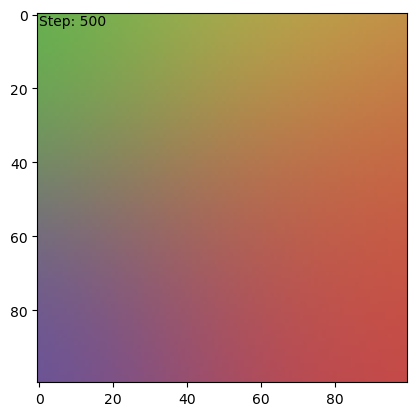

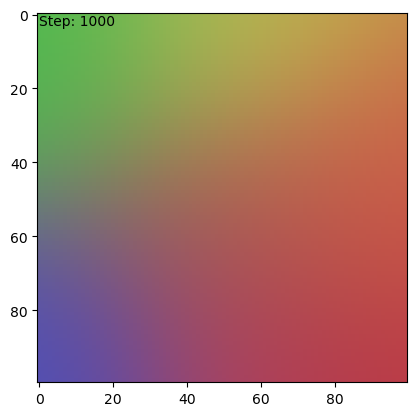

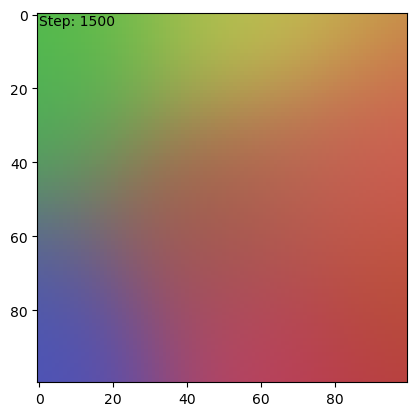

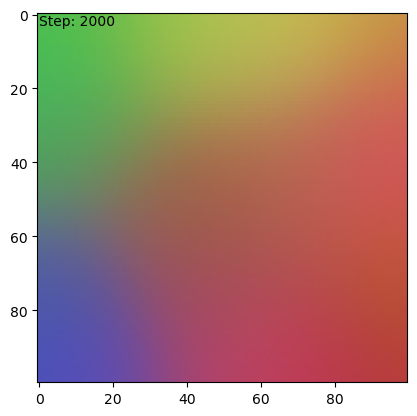

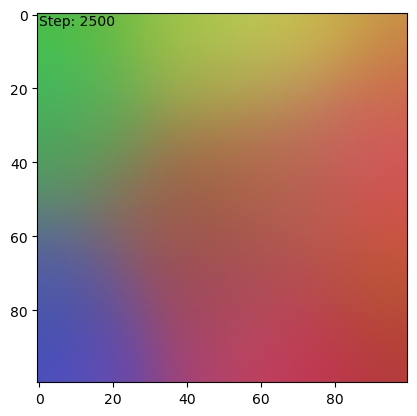

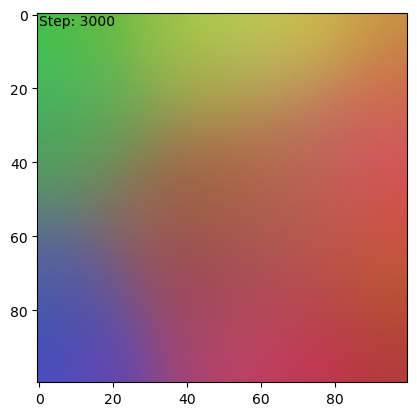

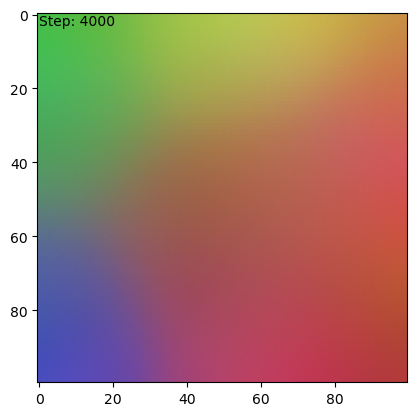

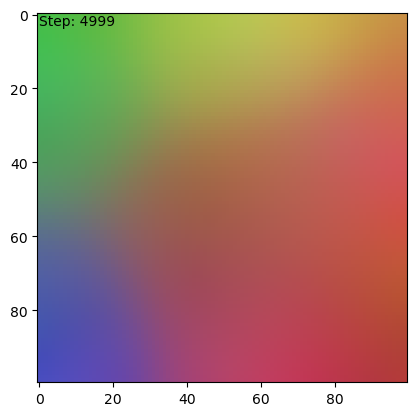

In [154]:



# Training 
for i in range(iterate):
    
    # Step 1 : select input vector (randomly)
    ind = rand.randint(0, input2d.shape[0])
    sample = input2d[ind]
    
    # STEP 2: find best matching unit (BMU)      
    
    bmu = np.unravel_index(np.argmin(np.linalg.norm(grid - sample, axis=2)), grid.shape[:2])
    
    # Step 3: Update SOM neural grid (domain)
    # Step 3-1 Calculate the learning rate, neighborhood function
    
    lrn_rate    = Lr[i]    # learning rate
    # neighborhood function
    neighb_func = Nbh[i] # 
    distance = np.linalg.norm(index_map - bmu, axis = 2)
    S = np.exp(-distance**2 / (2*neighb_func**2))           

 
    # Step 3-2: Update grid
    grid = grid + lrn_rate* S[:,:,np.newaxis] * (sample - grid)

    
    #===========
    # plot 
    if i in [0]:
        plt.imshow(S)
        plt.text(0,0, 'Neighborhood function at Step 1', va = 'top') 
        plt.show()
        print('='*20)
        print('\n'*10)
        print('='*20)
    
    #if np.mod(i, 100)==0:
    if i in [1, 10, 20, 50,  75, 100, 500, 1000, 1500, 2000, 2500, 3000, 4000, iterate-1]:
        plt.imshow(grid) 
        plt.text(0,0, 'Step: '+str(i), va = 'top')   
        plt.show() 

